In [1]:
cd ../src

/Users/hilary/Documents/dsi/repos/Capstone2/src


In [8]:
import peak
import folium
import itertools
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
person = "KM_Strava"
person_df = pd.read_parquet(f"../data/{person}/df.parquet")
peaks = peak.peak_detector(person_df, 400)
peaks = peaks.dropna(subset=['position_lat', 'position_long']) #WORK ON THIS
epsilon = 0.001
clustering = DBSCAN(eps=epsilon, metric='haversine', min_samples=2).fit(peaks[['position_lat', 'position_long']])
peaks['cluster'] = clustering.labels_
most_freq = peaks['cluster'].value_counts().sort_values(ascending=False)
cluster_series = most_freq[most_freq.index != -1]
print(len(cluster_series))

44


In [6]:
cluster1 = cluster_series[:1]
cluster2 = cluster_series[1:2]
print(cluster1)
print(cluster2)

0    46
Name: cluster, dtype: int64
26    44
Name: cluster, dtype: int64


In [9]:
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c',
        '#fb9a99','#e31a1c','#fdbf6f','#ff7f00',
        '#cab2d6','#6a3d9a','#ffff99','#b15928']
colormap = itertools.cycle(colors)


cluster1 = cluster_series[:1]
peak.plot_multiple_clusters(person_df, peaks, itertools.cycle(['red']), cluster1, 10)

In [10]:
i=1
cluster = cluster_series[i:i+1]
peak.plot_multiple_clusters(person_df, peaks, itertools.cycle(['blue']), cluster, 10)

In [11]:
peak.plot_multiple_clusters(person_df, peaks, colormap, cluster_series, 10)

In [12]:
cluster_series.head(5)

0     46
26    44
19    19
31    15
1     14
Name: cluster, dtype: int64

In [62]:
def analyze_cluster(summits_df, title):
    sns.set_context(rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
    fig, ax = plt.subplots(1, 3, figsize=(20,6))
    sns.histplot(data=summits_df, x='Elapsed Time', bins=20, ax=ax[0])
    ax[0].set_xlabel('Elapsed Time (in minutes)')
    sns.histplot(data=summits_df, x='Distance', bins=20, ax=ax[1])
    ax[1].set_xlabel('Distance (in miles)')
    ax[1].set_ylabel(' ')
    sns.histplot(data=summits_df, x='Activity Type', ax=ax[2], shrink=0.4)
    ax[2].set_ylabel(' ')
    ax[2].yaxis.label.set_visible(False)
    fig.suptitle(title)
    return fig

46


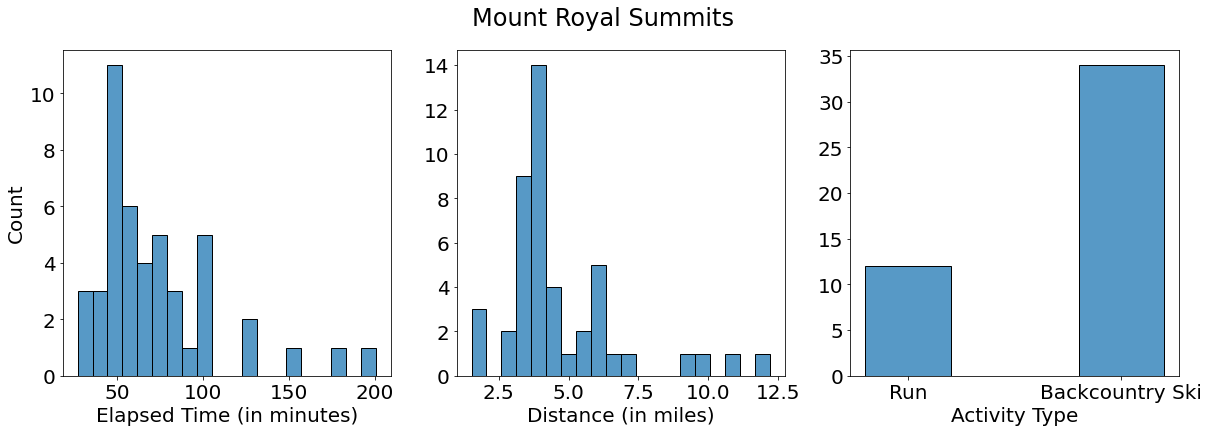

In [63]:
royal_acts = list(peaks.query('cluster==0').index)
print(len(royal_acts))

overview_df = pd.read_csv(f'../data/{person}/activities.csv')
royal_df = overview_df[overview_df['Activity ID'].isin(royal_acts)].copy()
royal_df['Elapsed Time'] = np.round(royal_df['Elapsed Time']/60, 1)
fig = analyze_cluster(royal_df, 'Mount Royal Summits')
fig.savefig('../images/royalTDT.png')

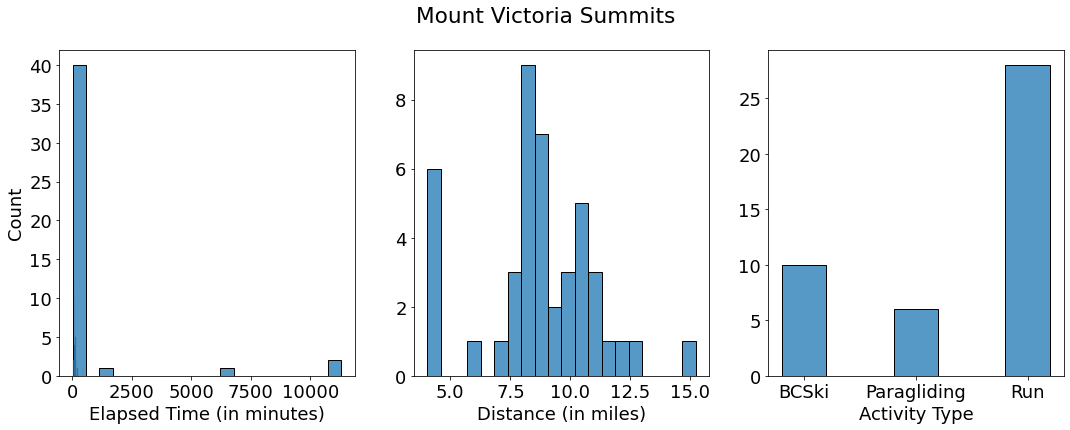

In [49]:
vic_df['Activity Type'] = vic_df['Activity Type'].replace('Kitesurf', 'Paragliding')
vic_df['Activity Type'] = vic_df['Activity Type'].replace('Backcountry Ski', 'BCSki')
fig, ax = analyze_cluster(vic_df, 'Mount Victoria Summits')


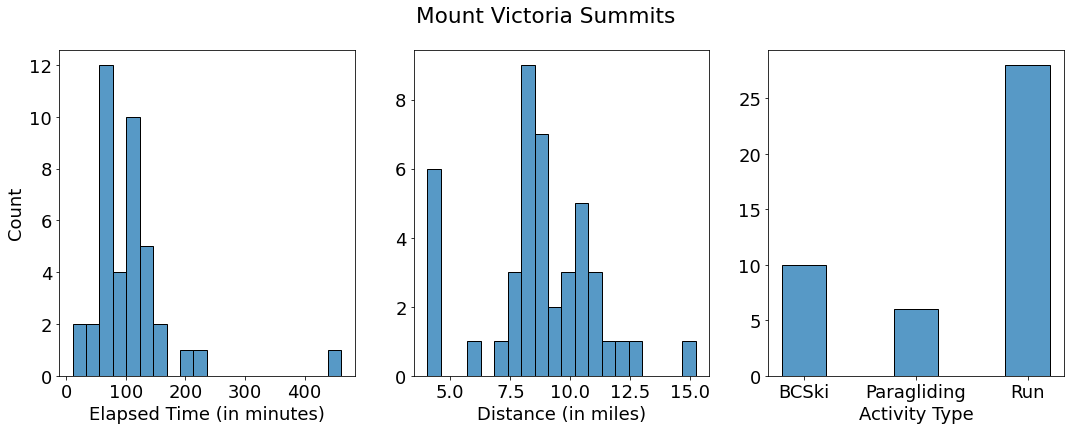

In [64]:
sns.set_context(rc={"font.size":18,"axes.titlesize":18,"axes.labelsize":18})
fig, ax = plt.subplots(1, 3, figsize=(18,6))
tmp = vic_df[vic_df['Elapsed Time']<500]
sns.histplot(data=tmp, x='Elapsed Time', bins=20, ax=ax[0])
ax[0].set_xlabel('Elapsed Time (in minutes)')
sns.histplot(data=vic_df, x='Distance', bins=20, ax=ax[1])
ax[1].set_xlabel('Distance (in miles)')
ax[1].set_ylabel(' ')
sns.histplot(data=vic_df, x='Activity Type', ax=ax[2], shrink=0.4)
ax[2].set_ylabel(' ')
fig.suptitle('Mount Victoria Summits')
fig.savefig('../images/vicTDAT.png')